In [1]:
# Imports
import librosa, librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import json
import cv2
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import pickle
import tensorflow as tf

In [2]:
# Load data
DATA_PATH = "JSON/Train_image.json"
IMG_SIZE = 48

def load_image_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
        
    X = np.array(data["image"]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y = np.array(data["labels"])
    return X, y

In [3]:
# Split data
def prepare_datasets(validation_size, X, y):

    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size)
    
    return X_train, X_validation, y_train, y_validation

In [4]:
# CNN model
def build_model(input_shape):
    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))                                
    model.add(keras.layers.Dropout(0.05))  
    
    model.add(keras.layers.Conv2D(16, (3, 3), activation='relu')) 
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))   
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))                                
    model.add(keras.layers.Dropout(0.35))
    
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(480, activation='relu'))
    model.add(keras.layers.Dropout(0.15))
    
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    return model

In [5]:
# Train/Test Split data
validation_size = 0.2

X_image, y_image = load_image_data(DATA_PATH)

with open('X_image.pickle', 'wb') as f:
    pickle.dump(X_image, f)
with open('y_image.pickle', 'wb') as f:
    pickle.dump(y_image, f)


X_image_train, X_image_validation, y_image_train, y_image_validation = prepare_datasets(validation_size, X_image, y_image)

In [6]:
# Image train
X_image_train = X_image_train.astype("float32")/255.0
X_image_validation = X_image_validation.astype("float32")/255.0

image_input_shape = (X_image_train.shape[1:])
image_model = build_model(image_input_shape)

image_optimizer = keras.optimizers.Adam(learning_rate=0.00014023399602325874)

image_model.compile(optimizer=image_optimizer,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

image_model.summary()

image_history = image_model.fit(X_image_train, y_image_train, batch_size=2, epochs=15, validation_data=(X_image_validation, y_image_validation))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0

Text(0.5, 1.0, 'Image Accuracy Curves')

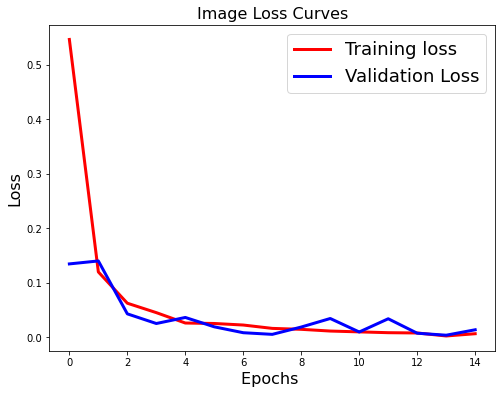

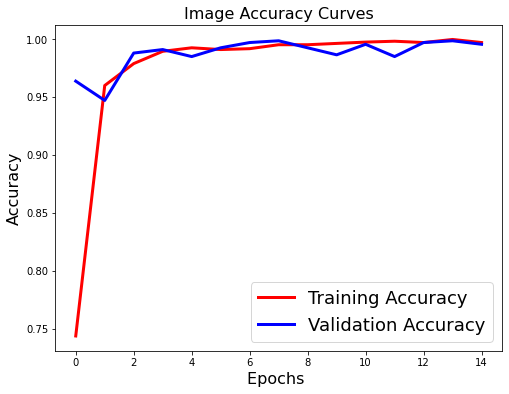

In [7]:
#Image Loss Curves
plt.figure(figsize=[8,6])
plt.plot(image_history.history['loss'],'r',linewidth=3.0)
plt.plot(image_history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Image Loss Curves',fontsize=16)

#Image Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(image_history.history['accuracy'],'r',linewidth=3.0)
plt.plot(image_history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Image Accuracy Curves',fontsize=16)

In [8]:
# Save model
image_model.save("Models/CNNimageClassifierV1.model")

INFO:tensorflow:Assets written to: Models/CNNimageClassifierV1.model\assets


In [9]:
image_model = tf.keras.models.load_model('Models/CNNimageClassifierV1.model')

In [10]:
# Retrive data
X, y = load_image_data("JSON/Test_image.json")

# Fit image data
X = X.astype("float32")/255.0
image_test_error, image_test_accuracy = image_model.evaluate(X, y, verbose=1)
print("Image test set accuracy: {}%".format(image_test_accuracy*100))

3/3 [==============================] - 0s 13ms/step - loss: 0.0050 - accuracy: 1.0000
Image test set accuracy: 100.0%
